
# Non-linear SVM


Perform binary classification using non-linear SVC
with RBF kernel. The target to predict is a XOR of the
inputs.

The color map illustrates the decision function learned by the SVC.

Based on code at: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html


First the usual imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

Prepare a dense grid to be classified.  The classes take an "xor" data shape, i.e. quadrants I and III to one class, and quadrants II and IV to the other.

In [2]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

Train the SVM (this time using the nu model, which replaces the "C" parameter)

In [11]:
# fit the model
clf = svm.NuSVC(gamma='auto',nu=0.8)
clf.fit(X, Y)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.8, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

Plot the results

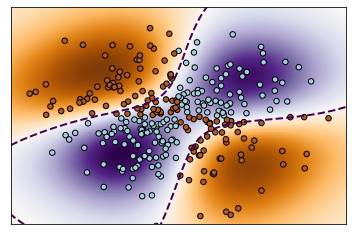

In [12]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()